# OSM network from a relation id

Use an OSM relation id to create a `networkx` graph from OSM.

Use OpenStreetMap to identify a boundary relations id. Then, use `osmnx` to retireve the relation id as a `GeoDataFrame`.


In [2]:
import osmnx as ox

from cityseer.tools import io, plot

In this case, we'll retrieve the London [Soho](https://www.openstreetmap.org/relation/17710512) boundary relation `17710512`. For this, we can use the `osmnx` [`geocode_to_gdf`](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.geocoder.geocode_to_gdf) function with the `by_osmid` parameter set to `True`. Note the preceding `R` prepended to the id as per the API documentation.


In [3]:
bounds_gdf = ox.geocode_to_gdf(
    "R17710512",  # OSM relation ID
    by_osmid=True,
)
bounds_gdf

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-0.14183 51.5151, -0.14162 51.51449,...",-0.141829,51.509966,-0.129378,51.516365,259863049,relation,17710512,51.514065,-0.135049,place,suburb,19,0.552695,neighbourhood,Soho,"Soho, City of Westminster, Greater London, Eng..."


Convert the `GeoDataFrame` into a unified Polygon using the `geopandas` `union_all` method.


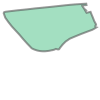

In [4]:
# returns a geoDataFrame - union for the geom
bounds_geom = bounds_gdf.union_all()
bounds_geom

If the geometry is complex, then the subsequent OSM API request (which happens behind the scenes) can fail due to a long URL request. In this case, you can take the geometrically simpler `convex_hull` instead. Alternatively, you can simplify the geometry, but remember to use spatial units matching the CRS of the geometry.


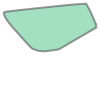

In [5]:
bounds_geom = bounds_geom.convex_hull
bounds_geom

The `shapely` geometry can then be passed to the `cityseer` [osm_graph_from_poly](https://cityseer.benchmarkurbanism.com/tools/io#osm-graph-from-poly) function, as per other examples.


In [6]:
G = io.osm_graph_from_poly(bounds_geom)
print(G)

INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
INFO:cityseer.tools.io:Converting networkX graph to CRS code 32630.
INFO:cityseer.tools.io:Processing node x, y coordinates.
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.graphs:Removing dangling nodes.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer.tools.util:Creating 

MultiGraph with 144 nodes and 210 edges


INFO:cityseer.tools.plot:Preparing graph nodes
INFO:cityseer.tools.plot:Preparing graph edges


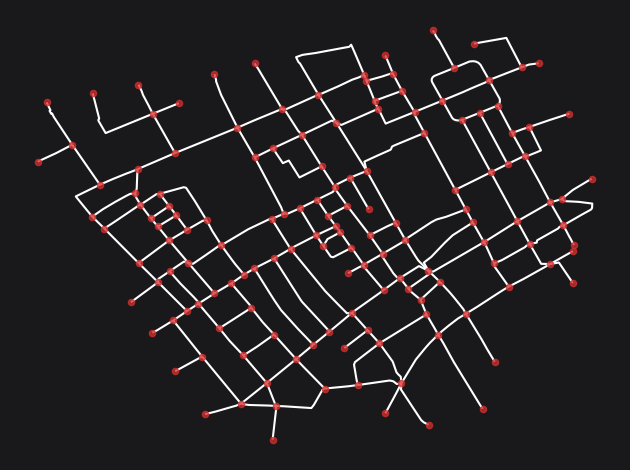

In [7]:
plot.plot_nx(G, plot_geoms=True)